In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as mp
import scipy.stats as ss
import seaborn as sbn

# Google play  store data

In [2]:
#reading the Google Play store data
google_data = pd.read_csv("D:/googleplaystore.csv", encoding = 'utf-8')
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
###function for getting main information about the data
def main_info(data):
    print("Dataset shape is: ", data.shape,"\n")
    print("Dataset columns are: ",data.columns,"\n")
    print("Dataset dimensions are:",data.ndim,"\n")
    print("Dataset information is:\n",data.info(),"\n")
    categorical, numerical = [], []
    for i in data.columns:
        if google_data[i].dtype==object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical datatype columns are: ", [i for i in categorical],"\n")
    print("Numericial datatype columns are: ", [i for i in numerical],"\n")

In [4]:
main_info(google_data)

Dataset shape is:  (10841, 13) 

Dataset columns are:  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object') 

Dataset dimensions are: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833

In [5]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Data cleaning

In [6]:
#checking if there are duplicates
sum(google_data.duplicated())

483

In [7]:
#dropping duplicates
google_data.drop_duplicates(keep='first', inplace=True)

In [8]:
sum(google_data.duplicated())

0

In [9]:
#checking NaN values
google_data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

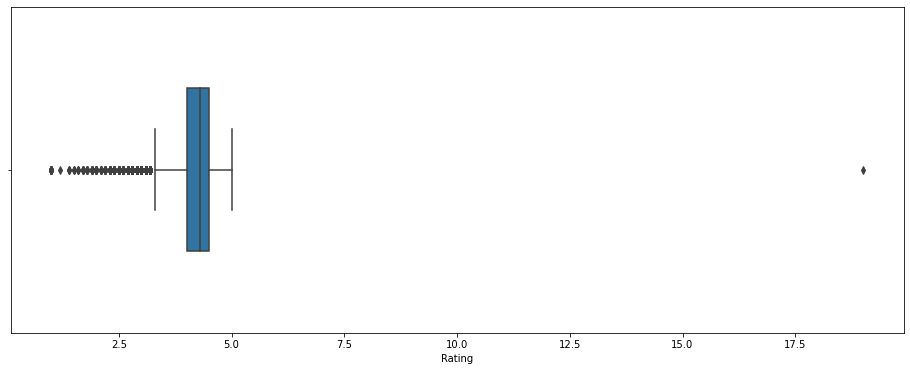

In [10]:
#drawing a boxplot to visualise our outliers for 'Rating' column
mp.figure(figsize=(16, 6))
sbn.boxplot(google_data['Rating'], width = 0.5, fliersize = 5)

In [11]:
google_data["Rating"] = google_data['Rating'].fillna('3.1')

In [12]:
google_data["Rating"].head(50)

0     4.1
1     3.9
2     4.7
3     4.5
4     4.3
5     4.4
6     3.8
7     4.1
8     4.4
9     4.7
10    4.4
11    4.4
12    4.2
13    4.6
14    4.4
15    3.2
16    4.7
17    4.5
18    4.3
19    4.6
20      4
21    4.1
22    4.7
23    3.1
24    4.7
25    4.8
26    4.7
27    4.1
28    3.9
29    4.1
30    4.2
31    4.1
32    4.5
33    4.2
34    4.7
35    3.8
36    4.7
37    4.1
38    4.7
39      4
40    4.2
41    4.5
42    4.4
43    3.8
44    4.2
45    4.7
46    4.6
47    4.2
48    4.3
49    4.2
Name: Rating, dtype: object

In [13]:
#doing changes with other Columns with NaN values
google_data['Type'].fillna('Free', inplace = True)

In [14]:
##standartize the column names
google_data.rename(columns={'Content Rating':'Content_Rating', 'Last Updated':'Last_Updated', 'Current Ver':'Current_Ver','Android Ver':'Android_Ver'}, inplace=True)

In [15]:
google_data.Android_Ver.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [16]:
google_data['Android_Ver'] = google_data['Android_Ver'].str.replace(' and up','').str.replace('5.0 - 8.0', '7.0').str.replace('W and up','4.4').str.replace('Varies with device','-1').str.replace('4.0.3','4.03').str.replace('2.3.3', '2.33').str.replace('4.0.3 - 7.1.1','7.11').str.replace('7.0 - 7.1.1','7').str.replace('2.0.1','2').str.replace('4.1 - 7.1.1','7.11').str.replace('5.0 - 6.0','6.0').str.replace('2.2 - 7.1.1', '5.2').str.replace('5.0 - 7.1.1','6.1').str.replace('4.03 - 7.1.1','6').str.replace('4.4W','4.4').astype('float')

In [17]:
google_data.Current_Ver.unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [18]:
google_data['Current_Ver'].fillna('No information provided', inplace = True)

In [19]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       3
dtype: int64

In [20]:
google_data['Content_Rating'].fillna('Everyone', inplace = True)

In [21]:
google_data.Category.unique()
#As we can see here we have a value like '1.9' which does not correspong to the 'Category' name, so let's make changes

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [22]:
google_data[google_data.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
google_data.loc[10472]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content_Rating                                   Everyone
Genres                                  February 11, 2018
Last_Updated                                       1.0.19
Current_Ver                                    4.0 and up
Android_Ver                                           NaN
Name: 10472, dtype: object

In [24]:
google_data.loc[10472, "Category"] = "LIFESTYLE"
google_data.loc[10472, "Rating"] = 1.9
google_data.loc[10472, "Reviews"] = 19
google_data.loc[10472, "Size"] = "3000000"
google_data.loc[10472, "Installs"] = "1000"
google_data.loc[10472, "Type"] = "Free"
google_data.loc[10472, "Price"] = "0"
google_data.loc[10472, "Content Rating"] = "Everyone"
google_data.loc[10472, "Genres"] = "Lifestyle"
google_data.loc[10472, "Last Updated"] = "February 11, 2018"
google_data.loc[10472,"Current Ver"] = "1.0.19"
google_data.loc[10472, "Android Ver"] = "4.0"

In [25]:
google_data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [26]:
google_data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [27]:

#making changes with 'Size' in order to be able to change it's type
google_data['Size']=google_data['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

In [28]:
pd.to_numeric(google_data['Size'])

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10836    53000000.0
10837     3600000.0
10838     9500000.0
10839           0.0
10840    19000000.0
Name: Size, Length: 10358, dtype: float64

In [29]:
google_data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', '1000'], dtype=object)

In [30]:
#making changes with 'Installs' to change it's type for using it later, for example, in EDA
google_data['Installs'] = google_data['Installs'].str.replace(',000,000,000', '000000000').str.replace('00,000,000', '00000000').str.replace('0,000,000', '0000000').str.replace(',000,000', '000000').str.replace('00,000','00000').str.replace('0,000','0000').str.replace(',000','000').str.replace('+','')

In [31]:
google_data.Installs.unique()


array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [32]:
pd.to_numeric(google_data['Installs'])

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10358, dtype: int64

In [33]:
google_data['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [34]:
#Function for replacing the '$' sign in 'Price' column
def price_replacement(price):
    if price == '0':
        price = 0
        return price
    elif '$' in price:
        price = price.replace("$","")
        return float(price)

In [35]:
google_data['Price'] = google_data["Price"].apply(lambda x: price_replacement(x))

In [36]:
google_data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [39]:
google_data['Price'] = google_data['Price'].astype('float')

# Data Visualisation

In [40]:
#Values of apps for each category
categories = google_data.Category.value_counts()


In [41]:
categories

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               374
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [147]:
top10_cat = google_data.Category.value_counts().head(15)


In [148]:
top10_cat

FAMILY                1943
GAME                  1121
TOOLS                  843
BUSINESS               427
MEDICAL                408
PRODUCTIVITY           407
PERSONALIZATION        388
LIFESTYLE              374
COMMUNICATION          366
FINANCE                360
SPORTS                 351
PHOTOGRAPHY            322
HEALTH_AND_FITNESS     306
SOCIAL                 280
NEWS_AND_MAGAZINES     264
Name: Category, dtype: int64

C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


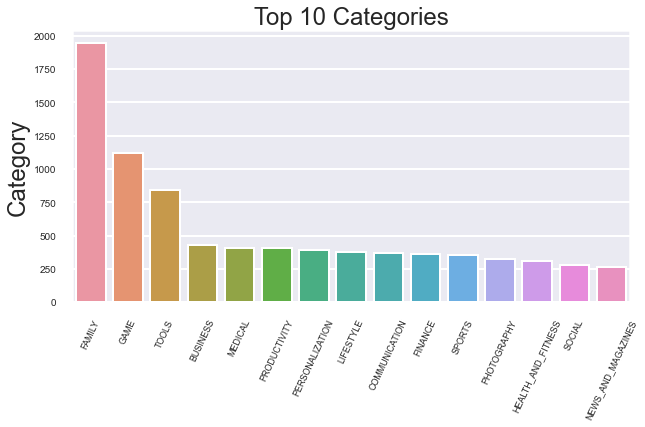

In [157]:
### not such a good graph
mp.figure(figsize=(10,5))
mp.xticks(rotation=65)
mp.title('Top 15Categories')

sbn.barplot(top10_cat.index, top10_cat);

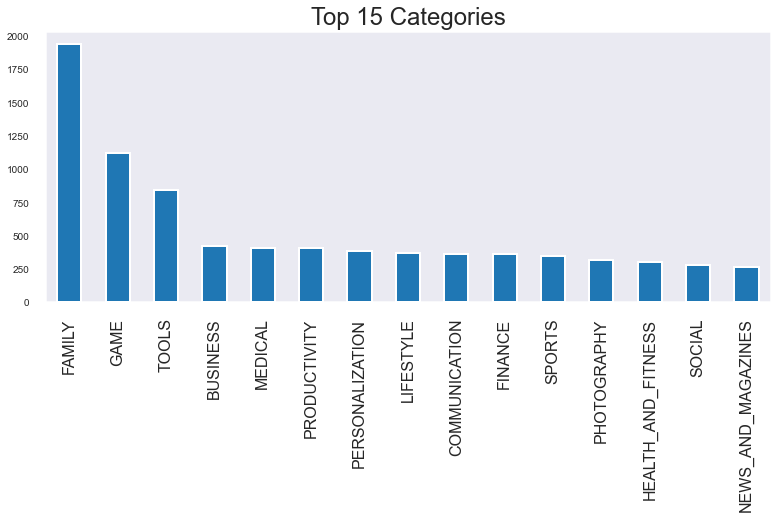

In [173]:
mp.figure(figsize=(13,5))
mp.rc('xtick',labelsize = 16)
mp.rc('ytick',labelsize = 10)
mp.title('Top 15 Categories')
google_data['Category'].value_counts().head(15).plot(kind='bar')
mp.grid()
mp.show()

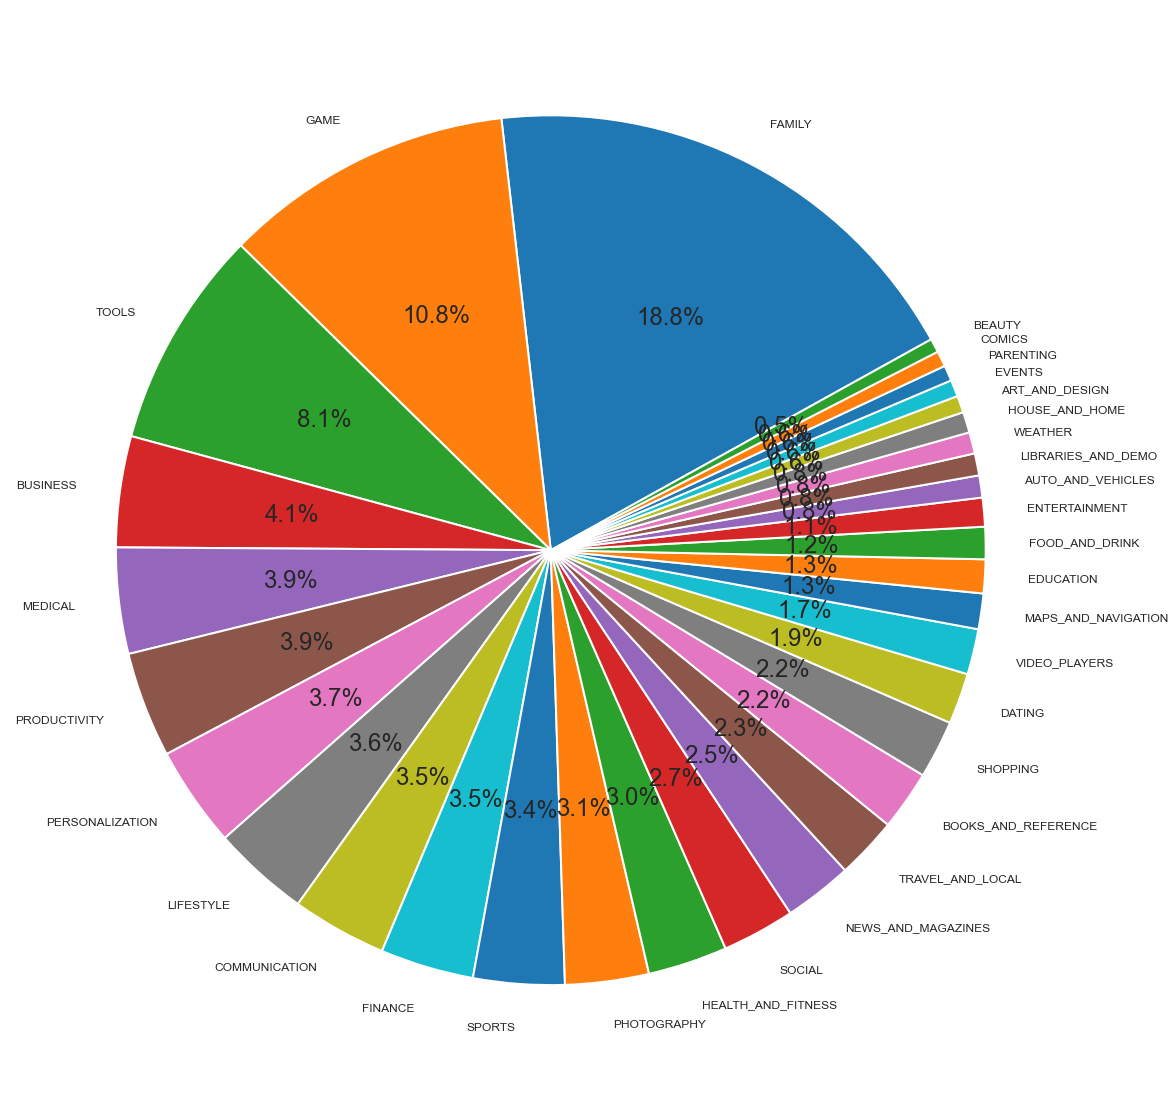

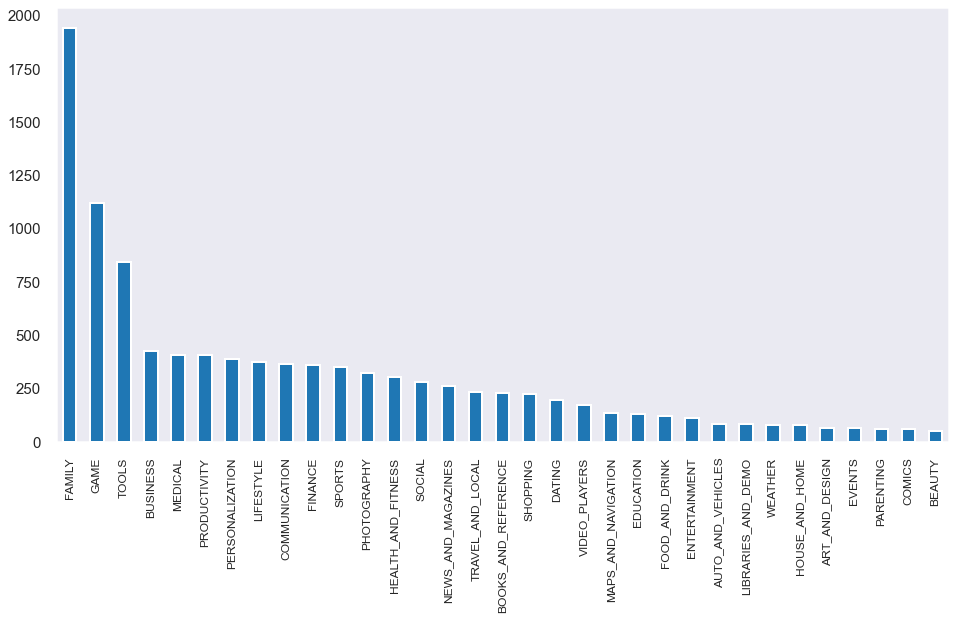

In [141]:
# Most popular categories
category = google_data['Category'].value_counts()
mp.figure(figsize=(30,20))
mp.pie(category, labels=category.index, autopct='%1.1f%%', startangle=389);

mp.figure(figsize=(16,8))
google_data['Category'].value_counts().plot(kind='bar')
mp.grid()
mp.show()

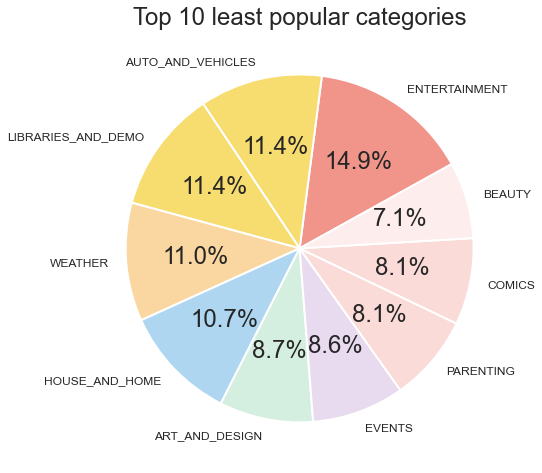

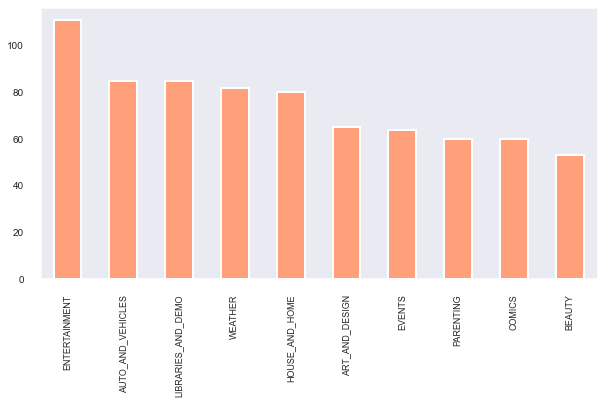

In [150]:

category = google_data['Category'].value_counts().tail(10)
mp.figure(figsize=(18,8))
mp.pie(category, labels=category.index, autopct='%1.1f%%', startangle=389,colors = ['#F1948A','#F7DC6F','#F7DC6F','#FAD7A0','#AED6F1'
,'#D4EFDF','#E8DAEF','#FADBD8','#FADBD8','#FDEDEC']);
mp.title('Top 10 least popular categories')

mp.figure(figsize=(10,5))
mp.rc('xtick', labelsize=9) 
mp.rc('ytick', labelsize=10)
google_data['Category'].value_counts().tail(10).plot(kind='bar', color = 'lightsalmon')
mp.grid()
mp.show()

In [49]:
google_data.dtypes

App                object
Category           object
Rating             object
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver       float64
Content Rating     object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [50]:
google_data['Reviews'] = google_data['Reviews'].astype('float')

In [51]:
google_data['Rating'] = google_data['Rating'].astype('float')

In [52]:
google_data['Rating'].value_counts()


3.1    1534
4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.3      20
2.5      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: Rating, dtype: int64

In [53]:
google_data['Rating'].value_counts().index.tolist() # for labels


[3.1,
 4.4,
 4.3,
 4.5,
 4.2,
 4.6,
 4.1,
 4.0,
 4.7,
 3.9,
 3.8,
 5.0,
 3.7,
 4.8,
 3.6,
 3.5,
 3.4,
 3.3,
 4.9,
 3.0,
 3.2,
 2.9,
 2.8,
 2.6,
 2.7,
 2.3,
 2.5,
 2.4,
 1.0,
 2.2,
 1.9,
 2.0,
 1.7,
 2.1,
 1.8,
 1.6,
 1.5,
 1.4,
 1.2]

C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


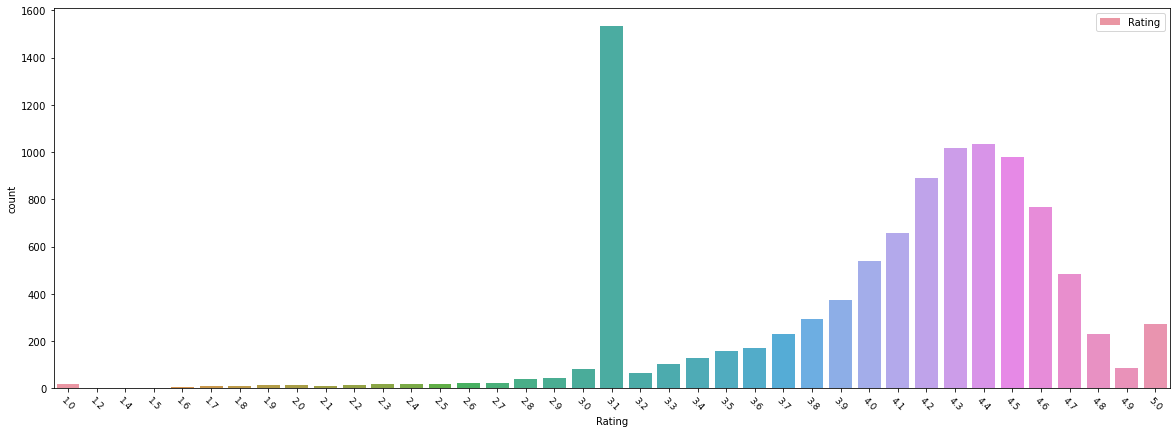

In [54]:
### Distribution of a rating
mp.figure(figsize=(20,7))
sbn.countplot(google_data['Rating'], label = "Rating")
mp.legend(loc= 'best')
mp.xticks(rotation= -45)
mp.show()

In [55]:
top100_app_rating = google_data.groupby('App')[['Rating']].mean().sort_values('Rating', ascending=False).head(1000)


In [56]:
top100_app_rating

,Rating
App,
Dr Bk Sachin bhai,5.0
Clinic Doctor EHr,5.0
EP Church Annapolis,5.0
Pyaar Ek Dhoka,5.0
Bacterial vaginosis Treatment - Sexual disease,5.0
...,...
"Speed Booster - Ram, Battery & Game Speed Booster",4.7
An Elite Warrior Ex,4.7
Kids Paint Free - Drawing Fun,4.7


In [ ]:
# I used this visualisation to show the distribution of Ratings .The labels are a little bit obscured, but the graph is still very nice so I decided to keep it.
#Please do not pay attention to the quality of the graph

C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ada\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ada\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127759 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ada\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ada\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s,

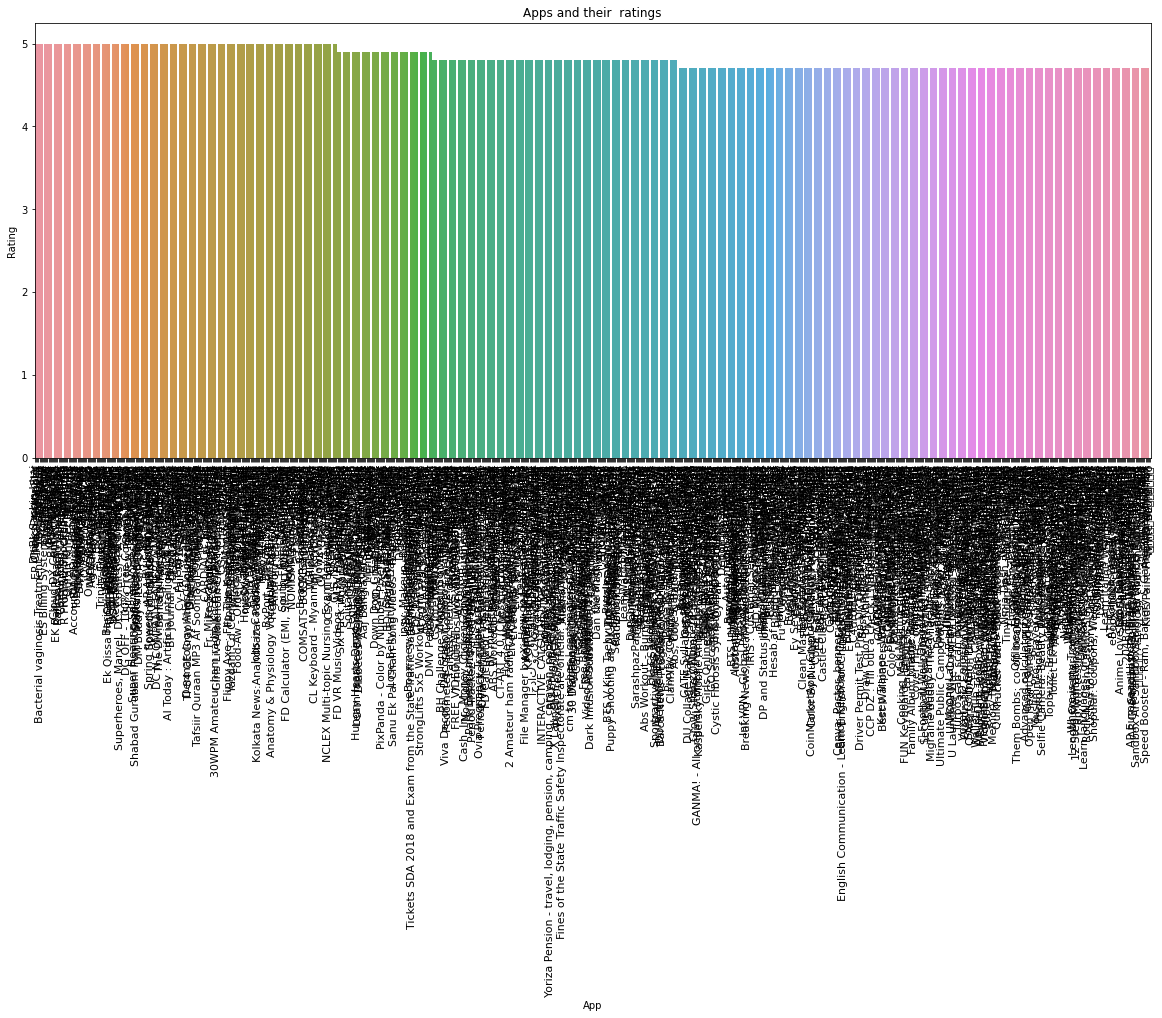

In [58]:
mp.figure(figsize = (20,8))
mp.rc('xtick', labelsize = 11)
sbn.barplot(top100_app_rating.index, top100_app_rating.Rating)
mp.title('Apps and their  ratings')
mp.xticks(rotation=90);
mp.ylabel('Rating');
mp.xlabel('App');

In [62]:
tail_app_rating1 = google_data.groupby('App')[['Rating']].mean().sort_values('Rating', ascending=False).tail(80)


In [ ]:
tail_app_rating1

In [63]:
###  80 apps with the lowest ratings

,Rating
App,
EZ LED,2.2
Air Transat CinePlus B,2.2
Thrive CF,2.2
CZ File Manager,2.2
bz Basel News,2.2
...,...
DS Creator 2.0,1.0
CJ DVD Rentals,1.0
Thistletown CI,1.0


C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


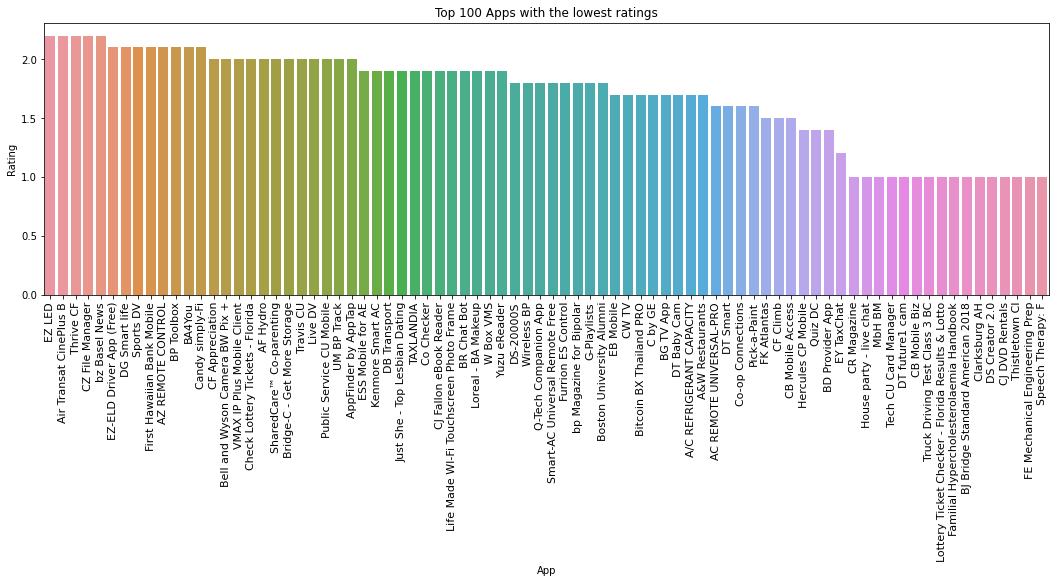

In [64]:
mp.figure(figsize = (18,5))
mp.rc('xtick', labelsize = 11)
sbn.barplot(tail_app_rating1.index, tail_app_rating1.Rating)
mp.title(' 80 Apps with the lowest ratings')
mp.xticks(rotation=90);
mp.ylabel('Rating');
mp.xlabel('App');

In [65]:
top10_app_rating2 = google_data.groupby('App')[['Rating']].sum().sort_values('Rating', ascending=False).head(30)


C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


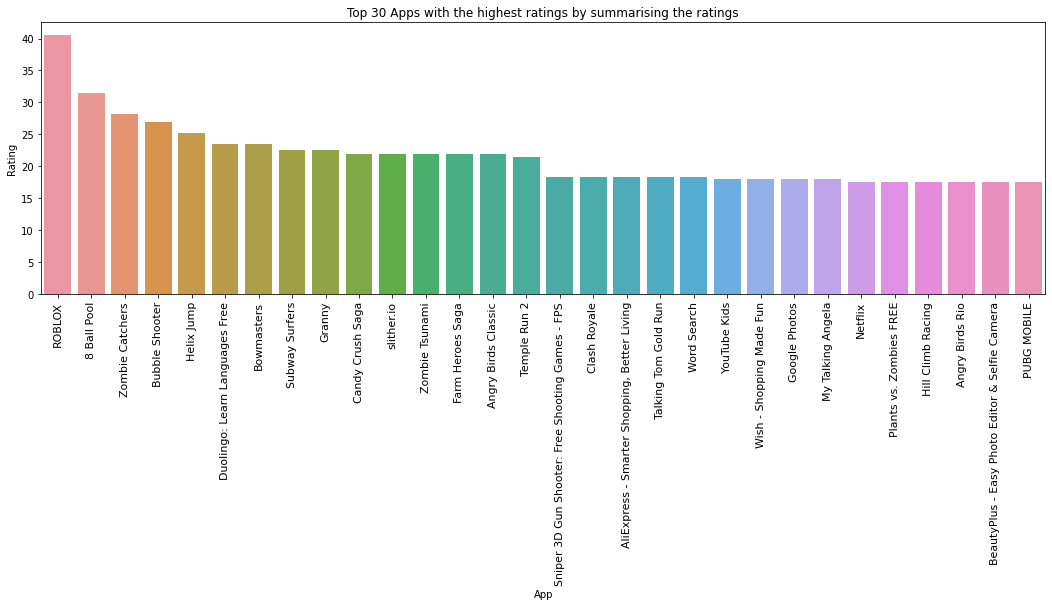

In [66]:
mp.figure(figsize = (18,5))
sbn.barplot(top10_app_rating2.index, top10_app_rating2.Rating)
mp.title('Top 30 Apps with the highest ratings by summarising the ratings')
mp.xticks(rotation=90);
mp.ylabel('Rating');
mp.xlabel('App');

In [67]:
###Apps with maximal ratings
google_data[google_data['Rating'] == 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Content Rating,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37000000.0,1000,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.03,NaN,NaN,NaN,NaN
612,American Girls Mobile Numbers,DATING,5.0,5.0,4400000.0,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.03,NaN,NaN,NaN,NaN
615,Awake Dating,DATING,5.0,2.0,70000000.0,100,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.40,NaN,NaN,NaN,NaN
633,Spine- The dating app,DATING,5.0,5.0,9300000.0,500,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.03,NaN,NaN,NaN,NaN
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5000000.0,100,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14.0,16000000.0,100,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.10,NaN,NaN,NaN,NaN
10742,GKPB FP Online Church,LIFESTYLE,5.0,32.0,7900000.0,1000,Free,0.0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.40,NaN,NaN,NaN,NaN
10776,Monster Ride Pro,GAME,5.0,1.0,24000000.0,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.30,NaN,NaN,NaN,NaN
10820,Fr. Daoud Lamei,FAMILY,5.0,22.0,8600000.0,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.10,NaN,NaN,NaN,NaN


In [68]:
types = google_data.Type.value_counts()

In [69]:
types

Free    9593
Paid     765
Name: Type, dtype: int64

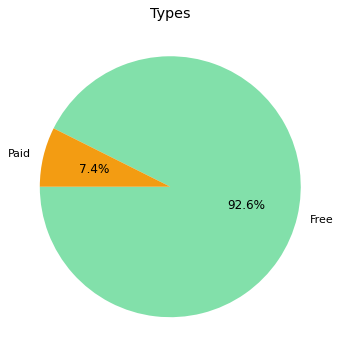

In [70]:
#Acquiring information about the ratio of "Free" and "Paid" apps in Google Play
mp.rcParams['font.size'] = 12
mp.figure(figsize=(12,6))
mp.title('Types')
mp.pie(types, labels=types.index, autopct='%1.1f%%', startangle=180,colors = ['#82E0AA','#F39C12']);


In [71]:
content_rating = google_data.Content_Rating.value_counts()


In [72]:
content_rating

Everyone           8383
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64

C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


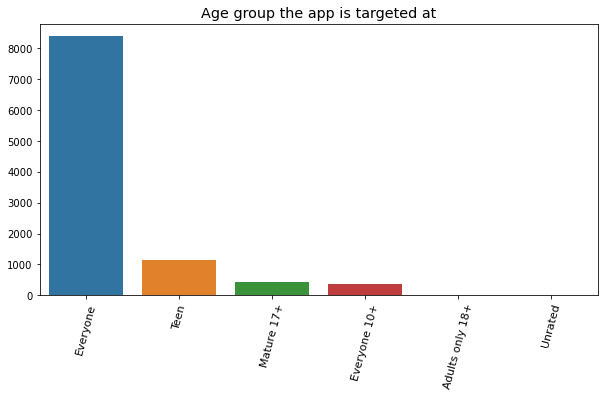

In [73]:
#Acquiring informaition about the target audience of most apps in Google Play

mp.figure(figsize=(10,5))
sbn.barplot(content_rating.index, content_rating)
mp.xticks(rotation=75);
mp.title('Age group the app is targeted at')
mp.ylabel(None);

In [74]:
genres = google_data.Genres.value_counts().head(10)


In [75]:
genres

Tools              842
Entertainment      588
Education          527
Business           427
Medical            408
Productivity       407
Personalization    388
Lifestyle          373
Communication      366
Sports             364
Name: Genres, dtype: int64

C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


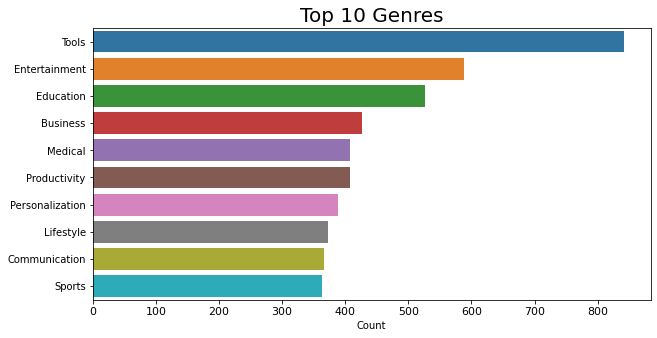

In [76]:
##Acquiring information about developer capabilities that contribute to Google Play
mp.figure(figsize=(10,5))
sbn.barplot(genres, genres.index)
pallette = ( "cubehelix_r")
mp.title('Top 10 Genres', size = 20)
mp.ylabel(None);
mp.xlabel('Count', size = 10);

In [77]:
google_data['Installs'] = google_data['Installs'].astype('float')

In [78]:
top10_app_installs = google_data.groupby('App')[['Installs']].sum().sort_values('Installs', ascending=False).head(10)


C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


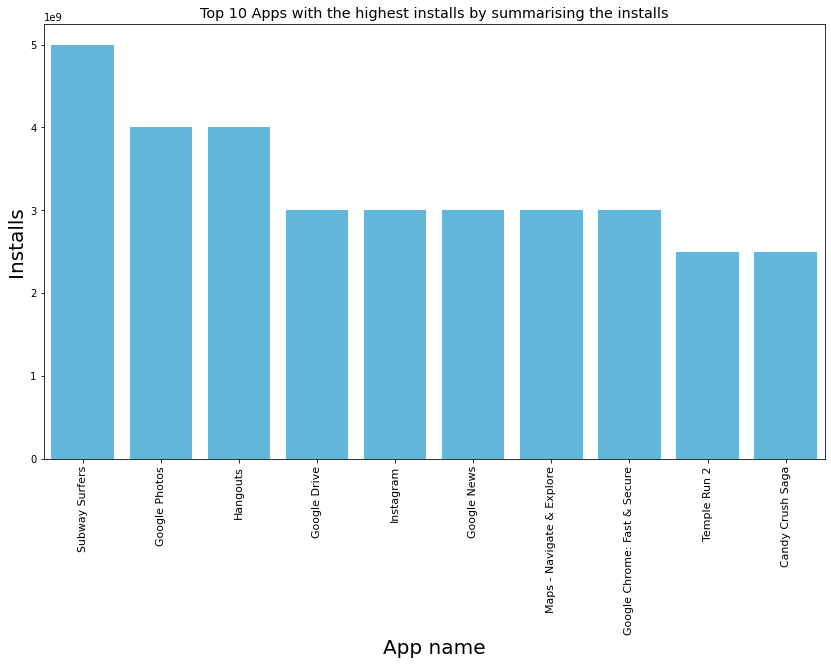

In [79]:
mp.figure(figsize = (14,8))
sbn.barplot(top10_app_installs.index, top10_app_installs.Installs, color = [0.3010, 0.7450, 0.9330])
mp.title('Top 10 Apps with the highest installs by summarising the installs')
mp.xticks(rotation=90);
mp.ylabel('Installs', size= 20);
mp.xlabel('App name', size = 20);

In [80]:
google_data['Type'] = google_data['Type'].str.replace('Free', '0').str.replace('Paid', '1').astype('int')

In [81]:
google_data['Type'].head(50)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: Type, dtype: int32

Text(0.5, 1.0, 'The relation between Categories and size taking into account the Type of a category')

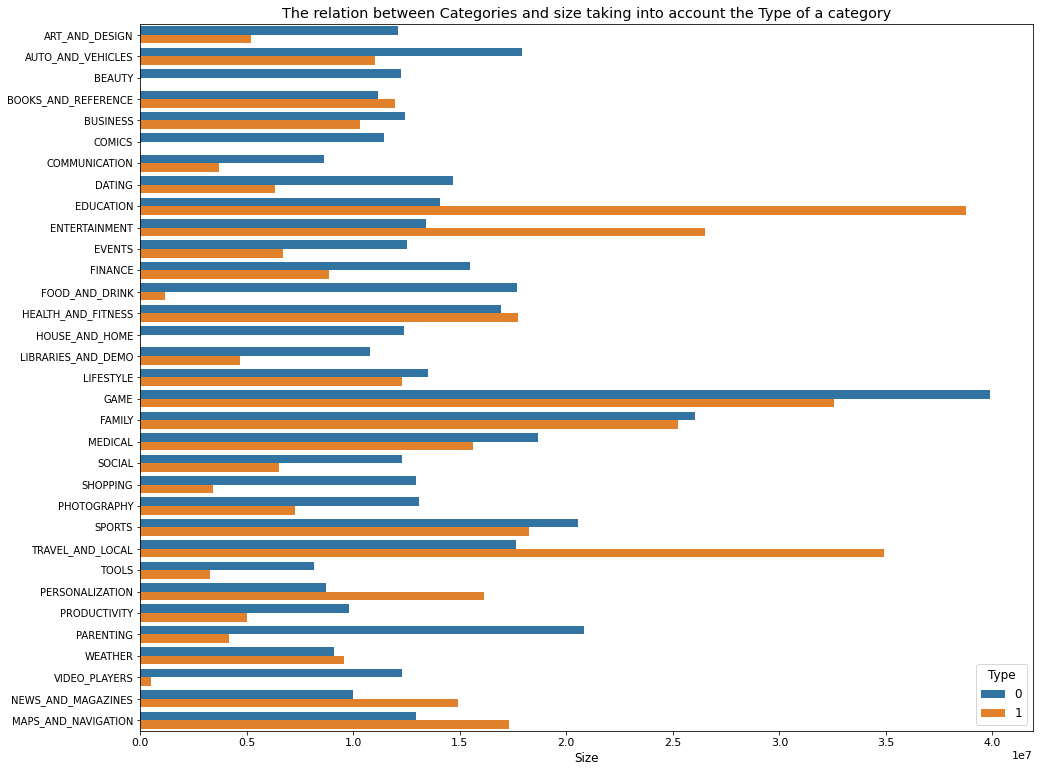

In [82]:
##
mp.figure(figsize = (16,13))
sbn.barplot(x = 'Size' , y = 'Category' , data = google_data, hue = 'Type', ci = None)
mp.xlabel('Size')
mp.ylabel('')
mp.title("The relation between Categories and size taking into account the Type of a category")

In [83]:
top10_category_reviews = google_data.groupby('Category')[['Reviews']].sum().sort_values('Reviews',ascending = False).head(10)


In [84]:
top10_category_reviews

,Reviews
Category,
GAME,1.415537e+09
COMMUNICATION,6.012736e+08
SOCIAL,5.335768e+08
FAMILY,3.967720e+08
TOOLS,2.731850e+08
PHOTOGRAPHY,2.042974e+08
VIDEO_PLAYERS,1.103802e+08
PRODUCTIVITY,1.025545e+08
SHOPPING,9.493116e+07


C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


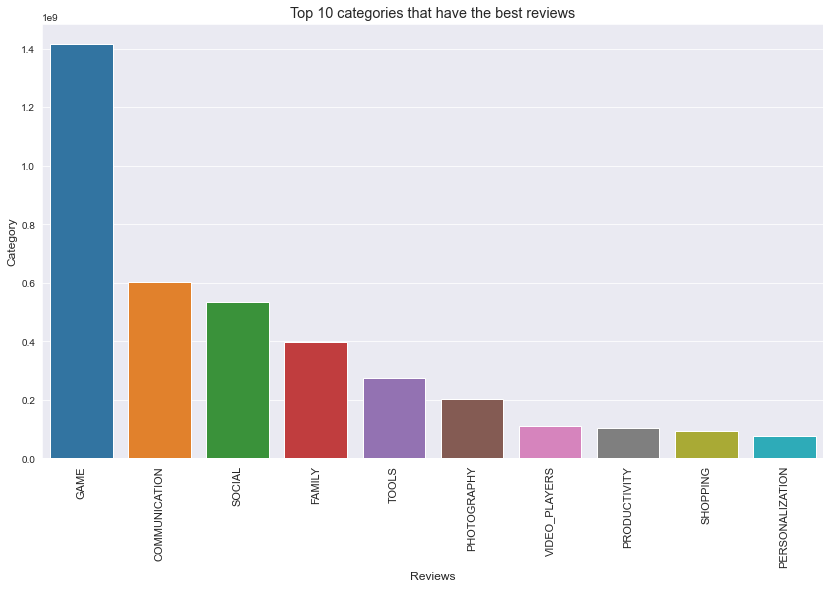

In [87]:
mp.figure(figsize = (14,8))
sbn.barplot(top10_category_reviews.index, top10_category_reviews.Reviews)
mp.title('Top 10 categories that have max reviews')
mp.xticks(rotation=90);
mp.ylabel('Category');
mp.xlabel('Reviews');

Text(0.5, 1.0, 'Size vs Installs')

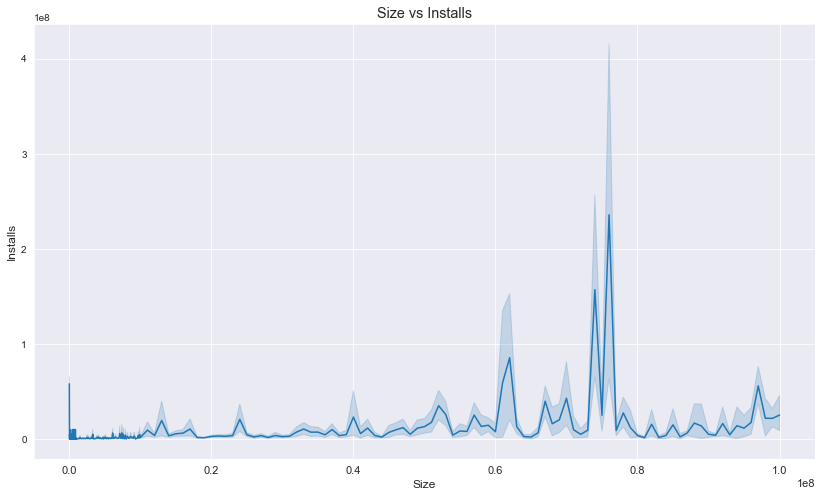

In [88]:
#Dependency of installation number from the app's size
sbn.set_style('ticks')
sbn.set_style("darkgrid")
mp.figure(figsize = (14,8))
sbn.lineplot(x='Size', y='Installs', data=google_data)
mp.title('Size vs Installs')

In [89]:
#Here we can see apps with the largest size
large_size_apps = google_data[google_data['Size']==google_data['Size'].max()]                                            
large_size_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Content Rating,Last Updated,Current Ver,Android Ver
1080,Post Bank,FINANCE,4.5,60449.0,100000000.0,1000000.0,0,0.00,Everyone,Finance,"July 23, 2018",2.9.12,4.00,NaN,NaN,NaN,NaN
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995.0,100000000.0,10000000.0,0,0.00,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.00,NaN,NaN,NaN,NaN
1758,Hungry Shark Evolution,GAME,4.5,6074334.0,100000000.0,100000000.0,0,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.10,NaN,NaN,NaN,NaN
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458.0,100000000.0,5000000.0,0,0.00,Everyone,Sports,"July 20, 2018",3.04.1,4.03,NaN,NaN,NaN,NaN
1988,Hungry Shark Evolution,GAME,4.5,6074627.0,100000000.0,100000000.0,0,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.10,NaN,NaN,NaN,NaN
2299,Navi Radiography Pro,MEDICAL,4.7,11.0,100000000.0,500.0,1,15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.03,NaN,NaN,NaN,NaN
3973,Hungry Shark Evolution,GAME,4.5,6071542.0,100000000.0,100000000.0,0,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.10,NaN,NaN,NaN,NaN
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124.0,100000000.0,5000.0,0,0.00,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.00,NaN,NaN,NaN,NaN
5427,Ultimate Tennis,SPORTS,4.3,183004.0,100000000.0,10000000.0,0,0.00,Everyone,Sports,"July 19, 2018",2.29.3118,4.03,NaN,NaN,NaN,NaN
5530,The Walking Dead: Our World,GAME,4.0,22435.0,100000000.0,1000000.0,0,0.00,Teen,Action,"August 1, 2018",1.1.0.3,5.00,NaN,NaN,NaN,NaN


In [90]:
pd.to_datetime(google_data['Last_Updated'],errors = 'coerce')

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last_Updated, Length: 10358, dtype: datetime64[ns]

In [91]:
most_downloads = google_data.groupby(['Last_Updated','Category'])[['Installs']].sum().sort_values('Installs', ascending=False)


In [92]:
most_downloads

,,Installs
Last_Updated,Category,
"July 12, 2018",GAME,5.550600e+09
"August 1, 2018",COMMUNICATION,5.437000e+09
"July 5, 2018",GAME,4.875100e+09
"August 6, 2018",PRODUCTIVITY,4.114000e+09
"July 21, 2018",COMMUNICATION,4.000000e+09
...,...,...
"July 26, 2015",MEDICAL,0.000000e+00
"July 7, 2018",NEWS_AND_MAGAZINES,0.000000e+00
"July 28, 2017",SOCIAL,0.000000e+00


In [93]:

most_downloads1 = google_data.groupby(['Last_Updated','App'])[['Installs']].sum().sort_values('Installs', ascending=False)


In [94]:
#Last update for the apps with the highest installs
most_downloads1

,,Installs
Last_Updated,App,
"July 12, 2018",Subway Surfers,5.000000e+09
"July 21, 2018",Hangouts,4.000000e+09
"July 31, 2018",Maps - Navigate & Explore,3.000000e+09
"August 6, 2018",Google Photos,3.000000e+09
"August 1, 2018",Google News,3.000000e+09
...,...,...
"June 28, 2018",Command & Conquer: Rivals,0.000000e+00
"April 15, 2016",Ain Arabic Kids Alif Ba ta,0.000000e+00
"July 30, 2017",AP Series Solution Pro,0.000000e+00


In [95]:
number_of_reviews = google_data.groupby('App')[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10)



C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


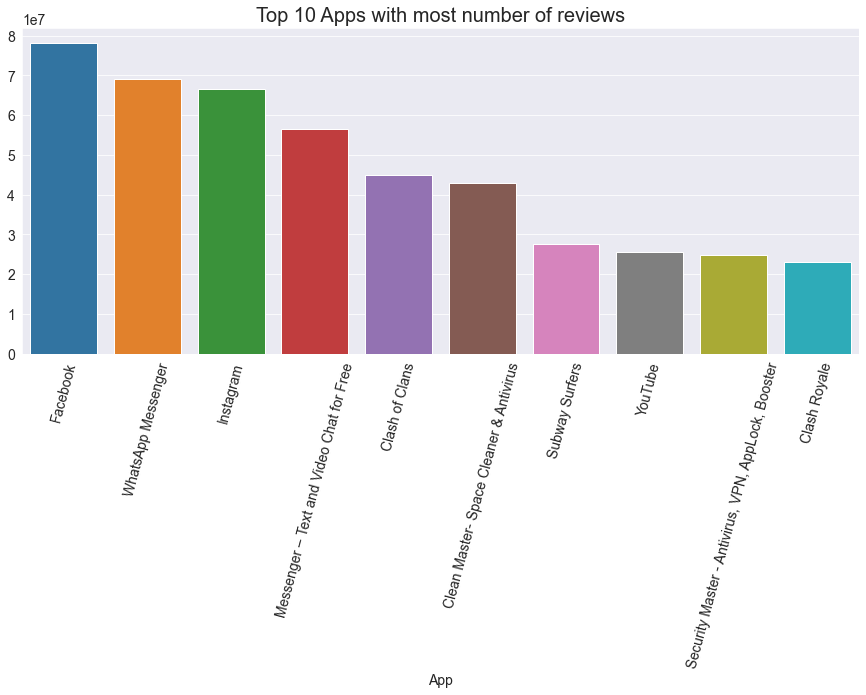

In [96]:
mp.figure(figsize = (15,6))
mp.rc('xtick', labelsize=14) 
mp.rc('ytick', labelsize=14)
sbn.barplot(number_of_reviews.index,number_of_reviews.Reviews)
mp.title('Top 10 Apps with most number of reviews', size = 20)
mp.xticks(rotation=75);
mp.ylabel(None);
mp.xlabel('App', size = 14);

In [97]:
google_data['Android_Ver'].value_counts()


 4.10    2379
 4.03    1451
 4.00    1337
-1.00    1221
 4.40     905
 2.30     643
 5.00     546
 4.20     387
 2.33     279
 2.20     239
 3.00     237
 4.30     235
 2.10     133
 1.60     116
 6.00      61
 7.00      45
 2.00      39
 3.20      36
 5.10      22
 1.50      20
 3.10      10
 8.00       6
 7.10       3
 1.00       2
 6.10       1
 5.20       1
 7.11       1
Name: Android_Ver, dtype: int64

C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


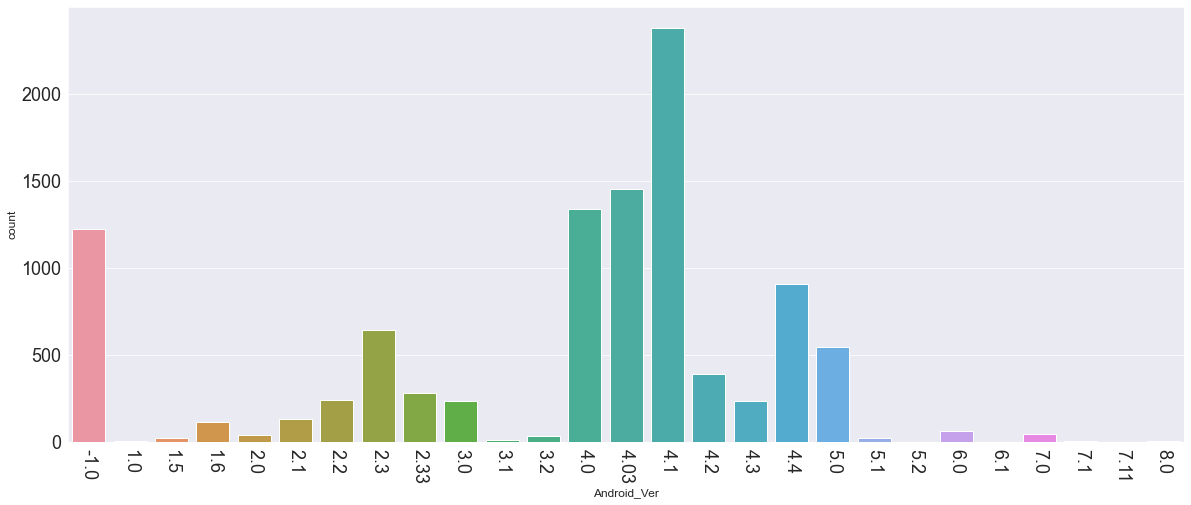

In [98]:
### The Distribution of Android Versions
mp.figure(figsize=(20,8))
mp.rc('xtick', labelsize=18) 
mp.rc('ytick', labelsize=18)
sbn.countplot(google_data['Android_Ver'])
mp.xticks(rotation = -90)
mp.show()

In [99]:
androidver_app = google_data.groupby('App')[['Android_Ver']].mean().sort_values('Android_Ver', ascending=False).head(20)
androidver_app

,Android_Ver
App,
Google Assistant Go,8.00
Clinic Doctor EHr,8.00
FD CANNECT,8.00
Moto Suggestions ™,8.00
Theme Android P for LG G7 & V35,8.00
My BP Lab,8.00
Google Now Launcher,7.11
OnePlus Gallery,7.10
Essential Resources,7.10


C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


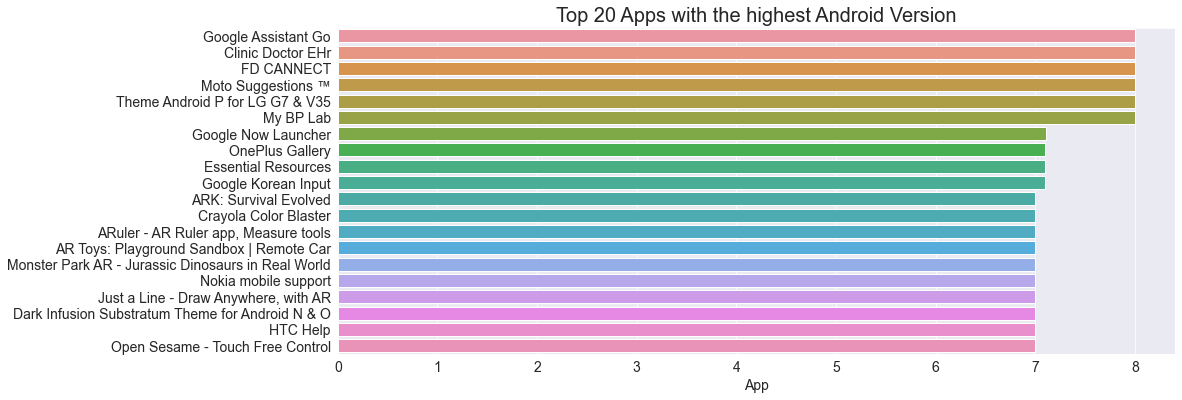

In [100]:
mp.figure(figsize = (15,6))
mp.rc('xtick', labelsize=14) 
mp.rc('ytick', labelsize=14)
sbn.barplot(androidver_app.Android_Ver,androidver_app.index)
mp.title('Top 20 Apps with the highest Android Version', size = 20)
mp.xticks(rotation=360);
mp.ylabel(None);
mp.xlabel('App', size = 14);

### Top 5 apps with the highest installation for most popular categories

In [101]:
# Here for this categories we will get top 5 apps with the highest installation
columns1 = ['GAME', 'COMMUNICATION', 'TOOLS','MEDICAL', 'SOCIAL',
       'PHOTOGRAPHY','FAMILY', 'NEWS_AND_MAGAZINES']
google_data.Installs = google_data.Installs/1000000


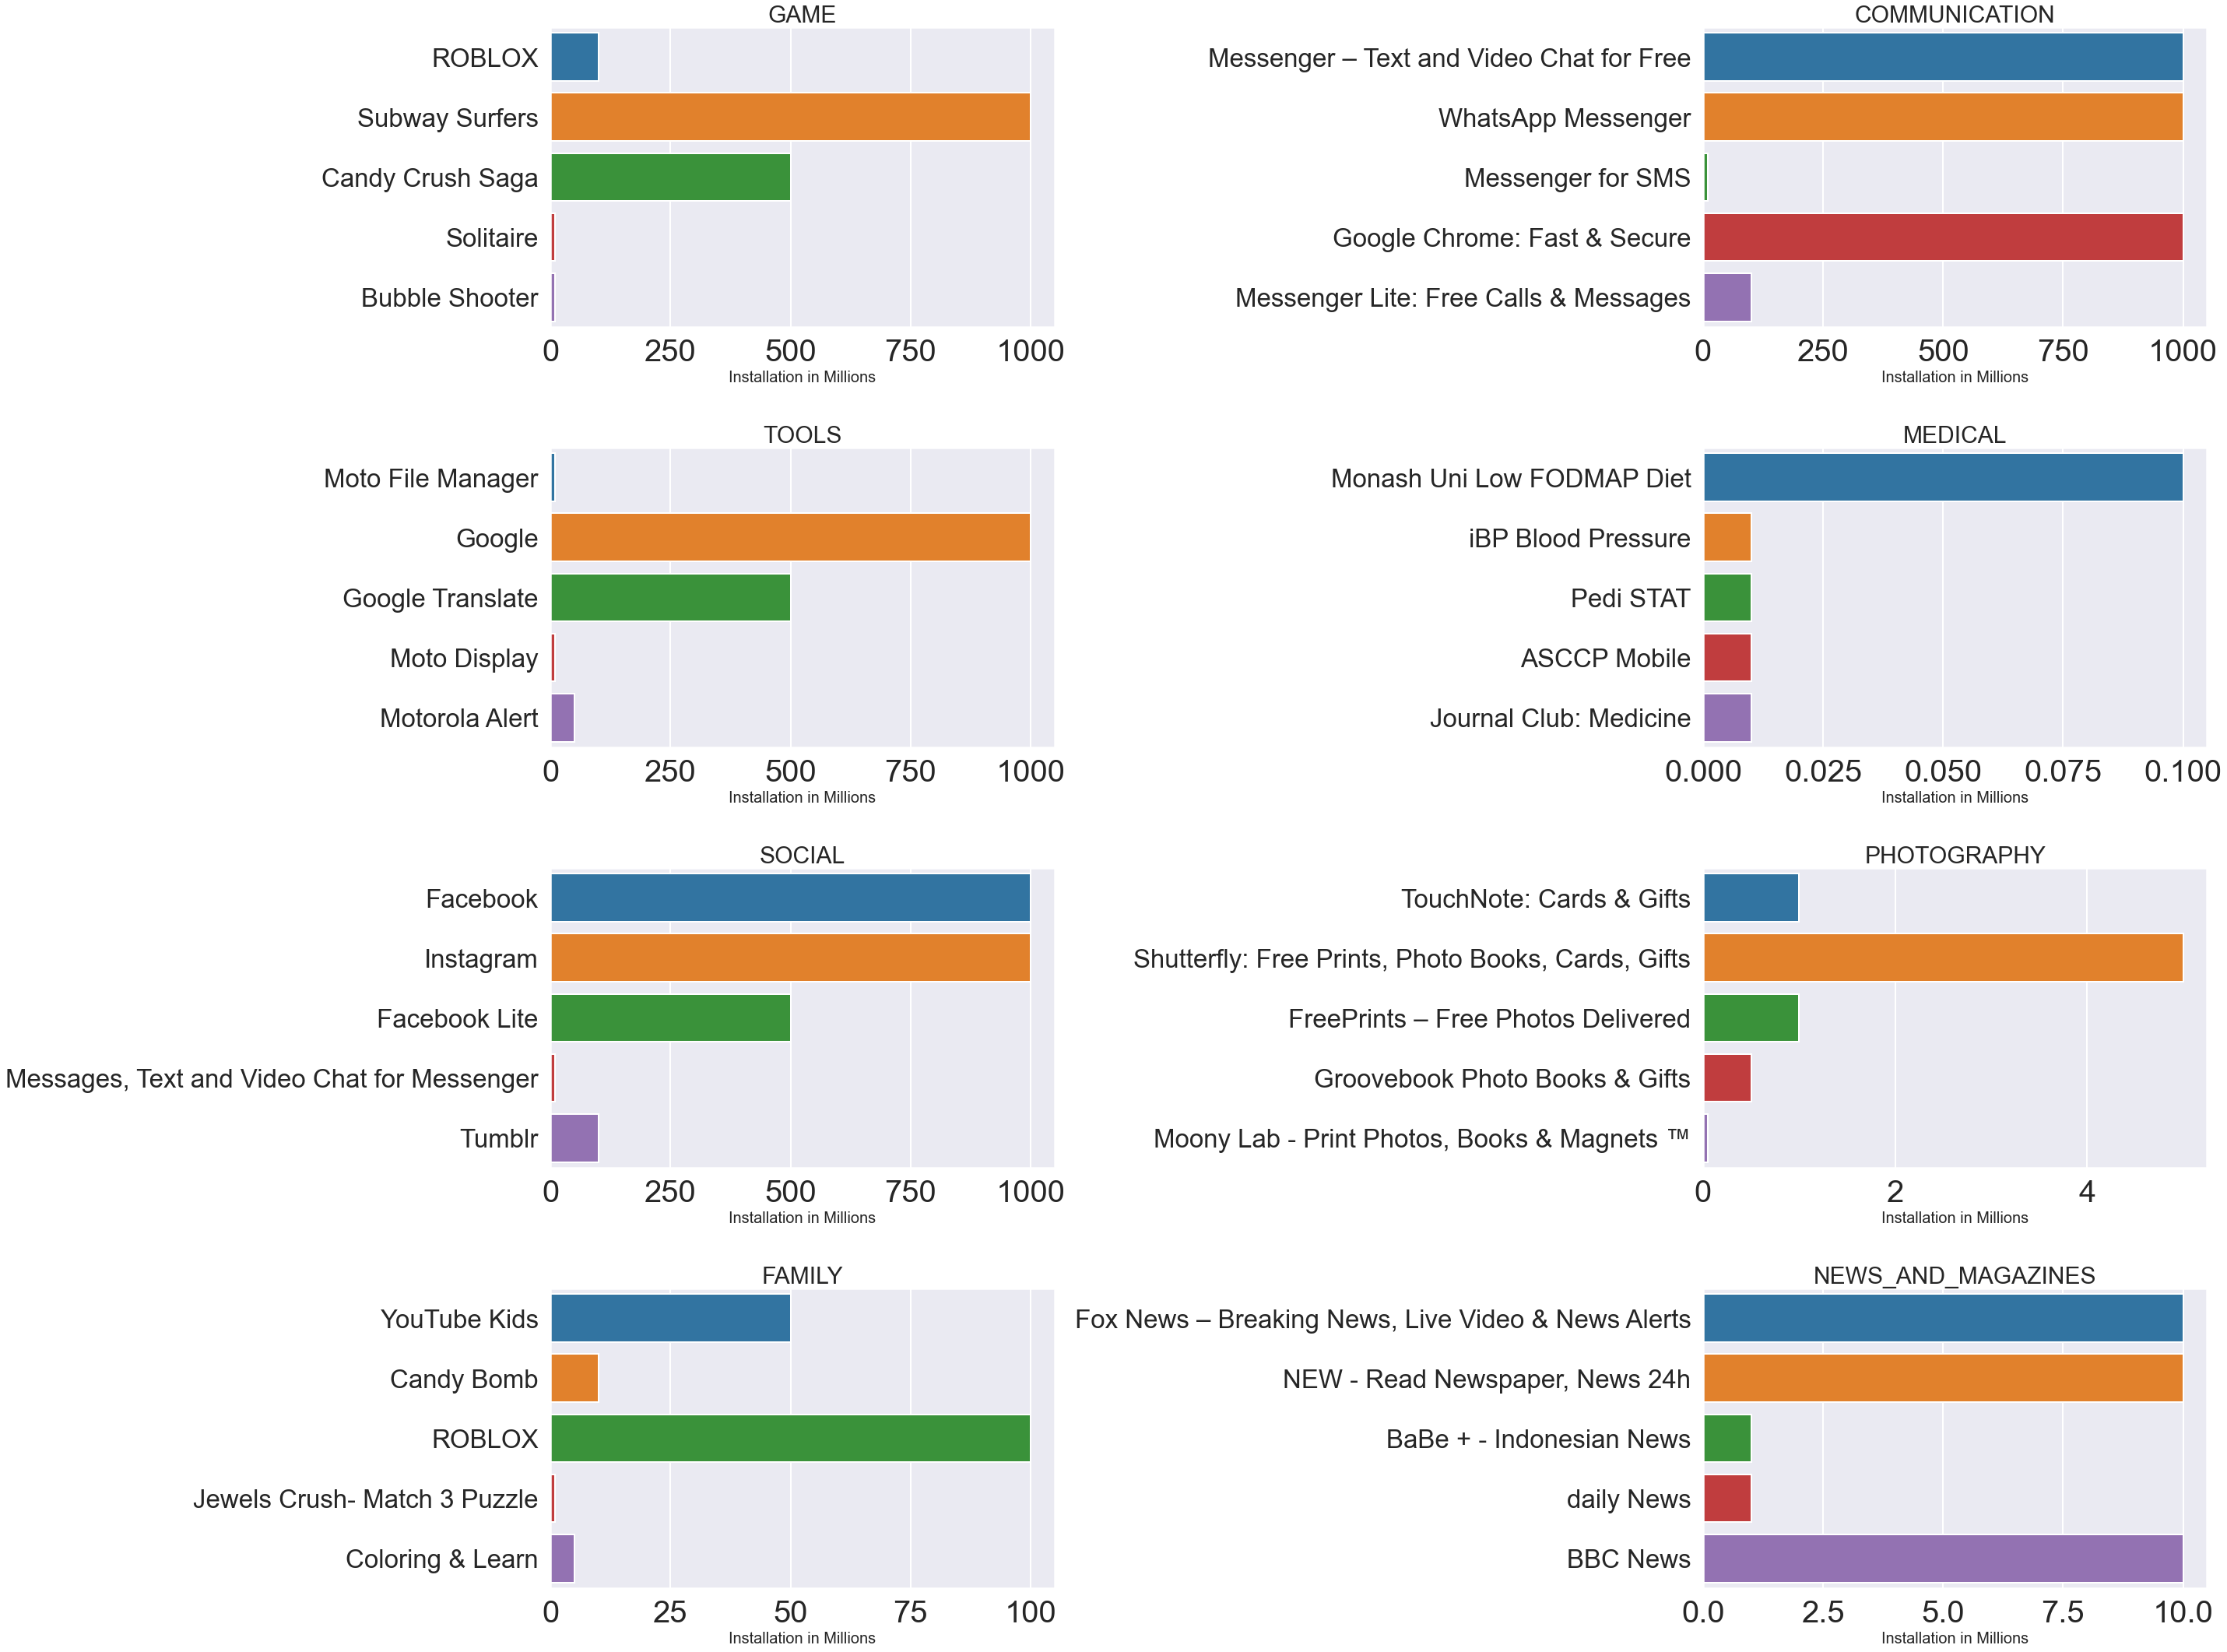

In [102]:
sbn.set_context("poster")
sbn.set_style("darkgrid")
mp.rc('xtick', labelsize=40) 
mp.rc('ytick', labelsize=33)
mp.figure(figsize=(40,30))

for i,app in enumerate(columns1):
    data2 = google_data[google_data.Category == app]
    data3 = data2.head(5)
    mp.subplot(4,2,i+1)
    sbn.barplot(data= data3, x = 'Installs', y ='App' )
    mp.xlabel('Installation in Millions',size = 20)
    mp.ylabel('')
    mp.title(app,size = 30)
    
mp.tight_layout()
mp.subplots_adjust(hspace= 0.4)
#mp.show()

In [103]:
columns2 = [ 'TRAVEL_AND_LOCAL','HOUSE_AND_HOME','AUTO_AND_VEHICLES', 'BOOKS_AND_REFERENCE',
         'SHOPPING', 'HEALTH_AND_FITNESS', 'SPORTS','COMICS']
google_data.Installs = google_data.Installs/1000000


C:\Users\Ada\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128214 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ada\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128214 missing from current font.
  font.set_text(s, 0, flags=flags)


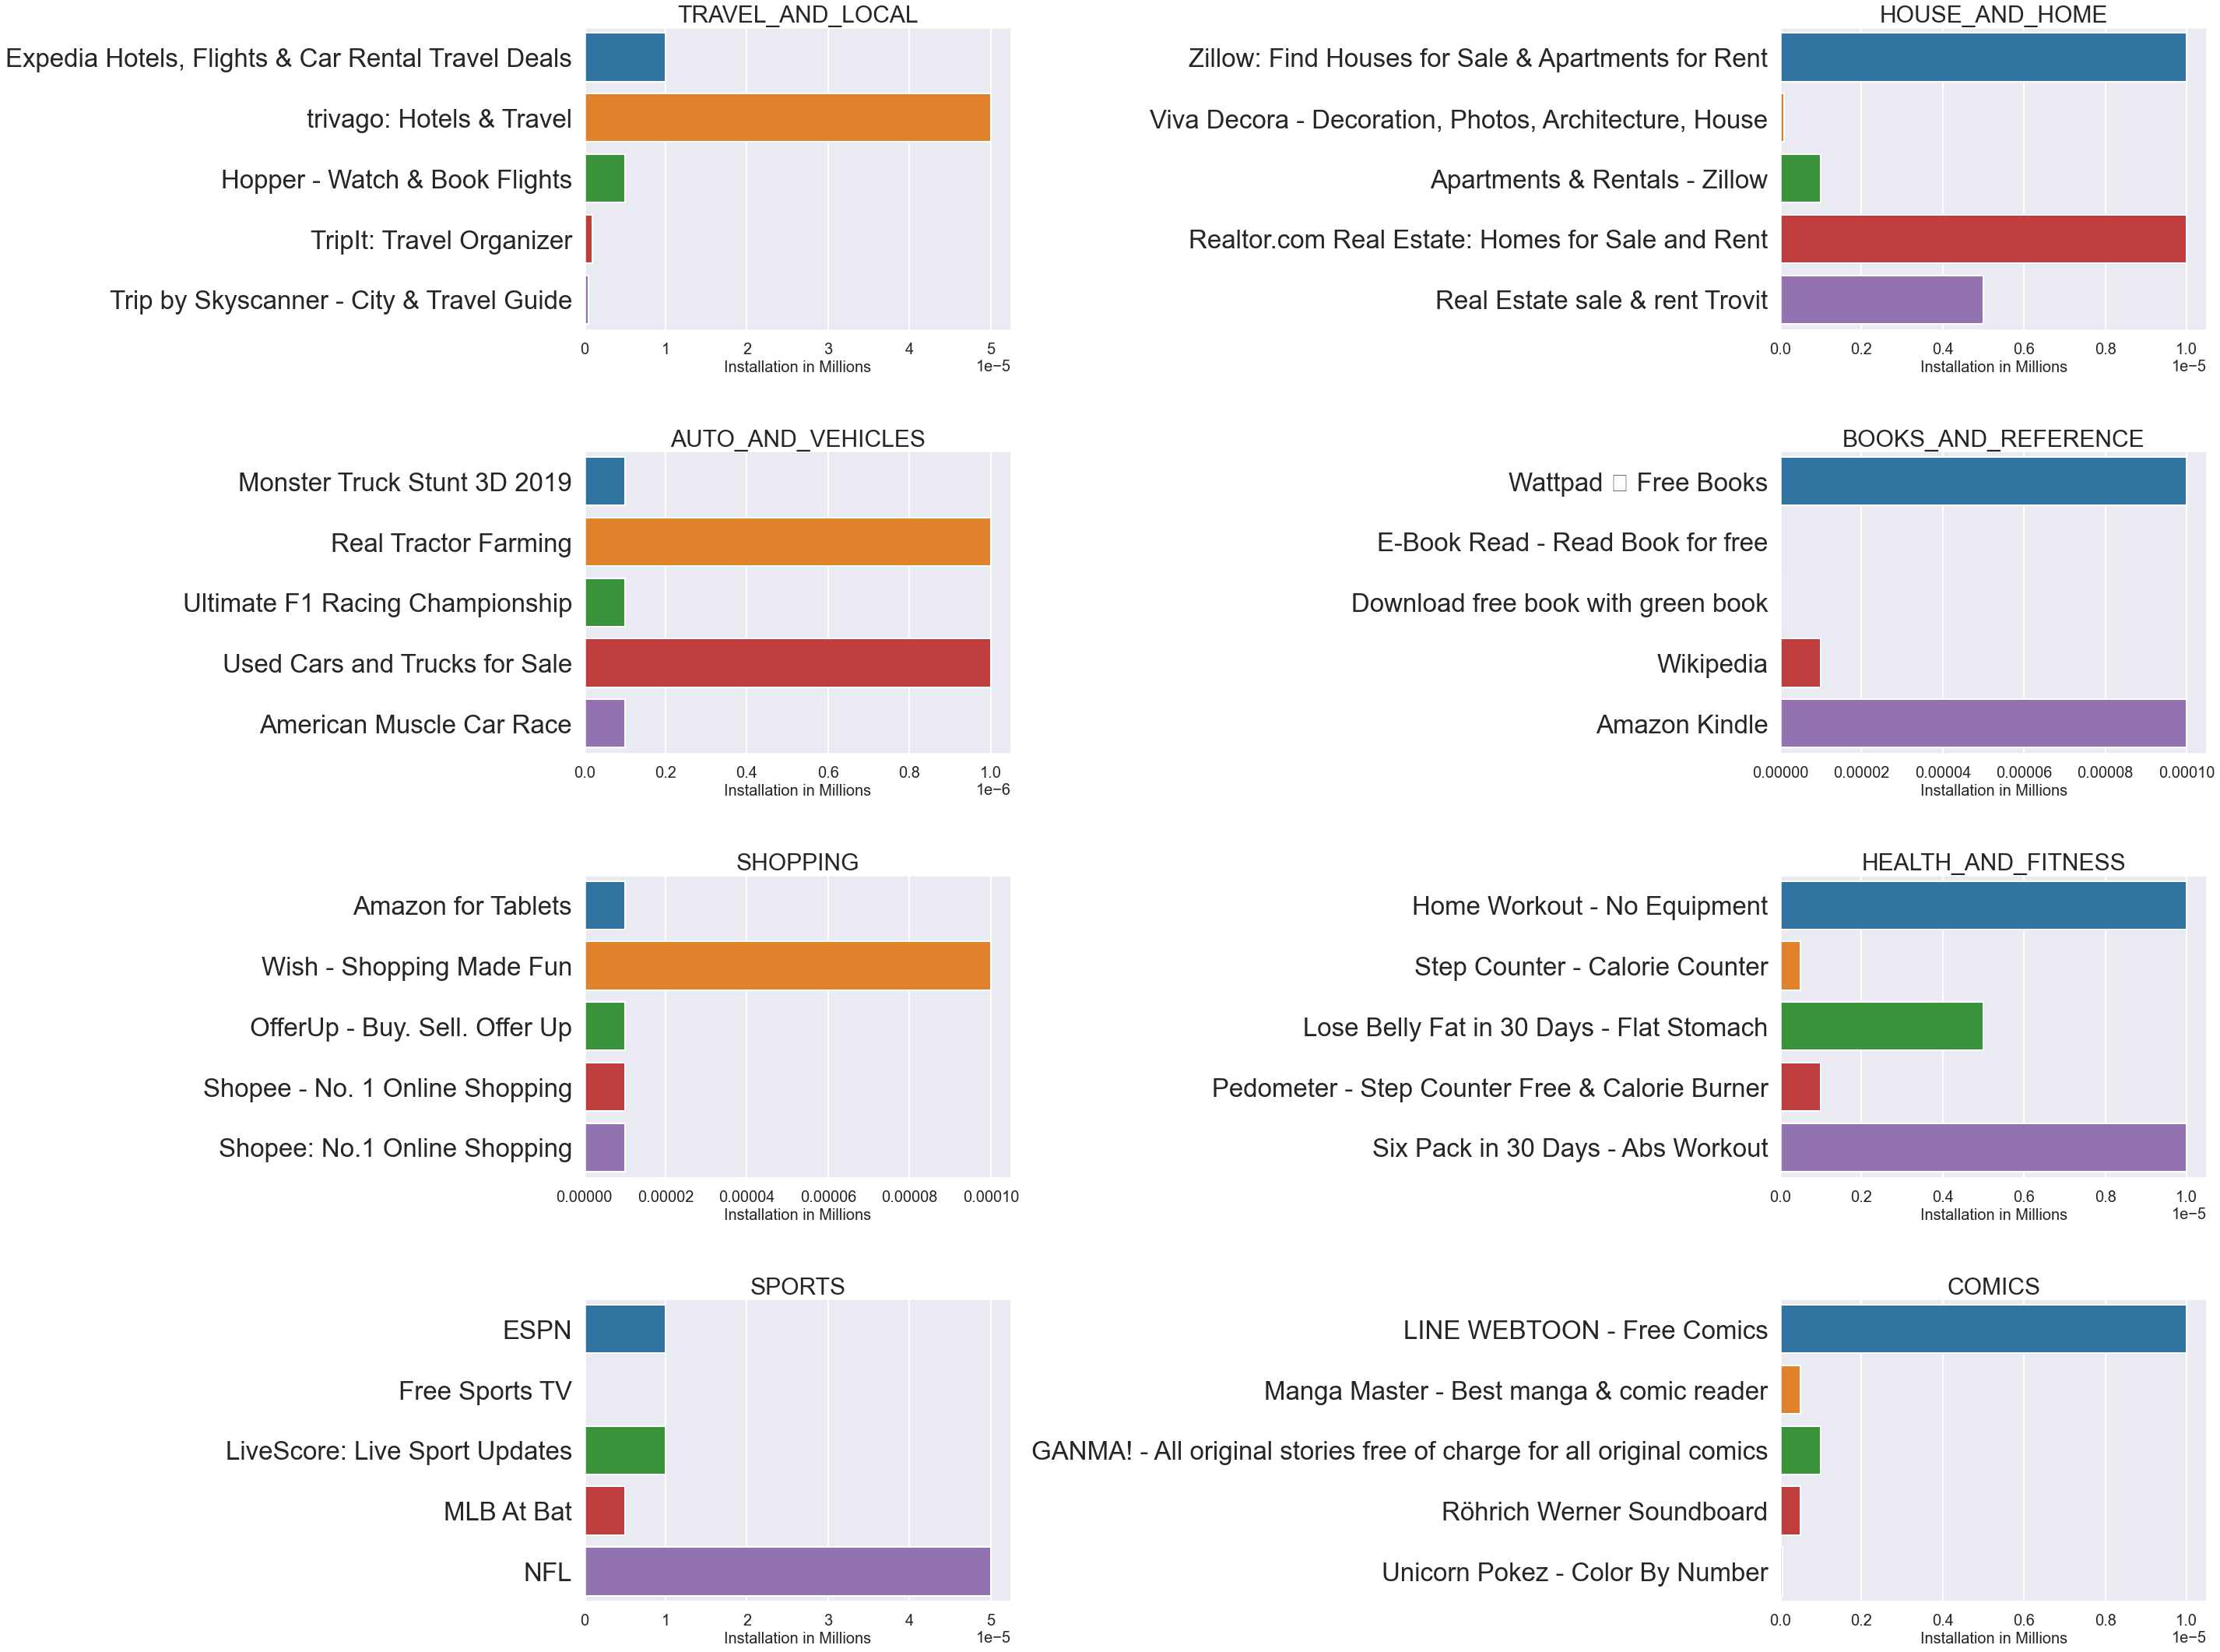

In [171]:

sbn.set_context("poster")
sbn.set_style("darkgrid")
mp.rc('xtick', labelsize=20) 
mp.rc('ytick', labelsize=33)
mp.figure(figsize=(40,30))

for i,app in enumerate(columns2):
    data2 = google_data[google_data.Category == app]
    data3 = data2.head(5)
    mp.subplot(4,2,i+1)
    sbn.barplot(data= data3, x = 'Installs', y ='App' )
    mp.xlabel('Installation in Millions',size = 20)
    mp.ylabel('')
    mp.title(app,size = 30)
    
mp.tight_layout()
mp.subplots_adjust(hspace= 0.4)
#mp.show()

In [105]:
#Grouping Categories, Installs, Apps with the highest 'Rating' = 5
rating = google_data.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()
toprating = rating[rating.Rating == 5.0]
toprating

,Category,Installs,App,Rating
461,FAMILY,1.000000e-10,Sir C J New Primary School,5.0
462,FAMILY,1.000000e-10,Railroad Radio Vancouver BC,5.0
463,FAMILY,1.000000e-10,Shabad Gurubani Punjabi mp3 free - Ek Onkar Sa...,5.0
464,FAMILY,1.000000e-10,TI-84 CE Graphing Calculator Manual TI 84,5.0
465,PERSONALIZATION,1.000000e-10,FO Bixby,5.0
...,...,...,...,...
727,PRODUCTIVITY,1.000000e-10,iReadMe,5.0
728,TOOLS,1.000000e-09,CL REPL,5.0
729,HEALTH_AND_FITNESS,5.000000e-11,CL Strength,5.0
730,HEALTH_AND_FITNESS,1.000000e-11,CB Fit,5.0


In [106]:
# Categories and the apps grouped by the size in an descending way
size = google_data.groupby(['Category','App'])['Size'].sum().sort_values(ascending = False).reset_index().head(21)


In [107]:
size

,Category,App,Size
0,GAME,Angry Birds Classic,485000000.0
1,GAME,Zombie Catchers,450000000.0
2,GAME,Subway Surfers,380000000.0
3,GAME,ROBLOX,335000000.0
4,GAME,Talking Tom Gold Run,312000000.0
5,GAME,8 Ball Pool,312000000.0
6,GAME,Temple Run 2,310000000.0
7,GAME,Hungry Shark Evolution,300000000.0
8,GAME,My Talking Angela,297000000.0
9,GAME,Miraculous Ladybug & Cat Noir - The Official Game,297000000.0


In [108]:
#Descriptive Statistics
minsize = google_data['Size'].min()
minsize

0.0

In [109]:
maxsize = google_data['Size'].max()
maxsize

100000000.0

In [110]:
meansize = google_data['Size'].mean()
meansize

18149783.59721954

In [111]:
modesize = google_data['Size'].mode()
modesize

0    0.0
dtype: float64

In [112]:
rating_min = google_data['Rating'].min()
rating_min

1.0

In [113]:
rating_max = google_data['Rating'].max()
rating_max

5.0

In [114]:
reviews_max = google_data['Reviews'].max()
reviews_max

78158306.0

In [115]:
reviews_mean = google_data['Reviews'].mean()
reviews_mean

405865.4248889747

### Descriptive statistics

In [116]:
google_data.describe()

,Rating,Reviews,Size,Installs,Type,Price,Android_Ver
count,10358.000000,1.035800e+04,1.035800e+04,1.035800e+04,10358.000000,10358.000000,10355.000000
mean,4.033790,4.058654e+05,1.814978e+07,1.415639e-05,0.073856,1.030701,3.287698
std,0.615155,2.696651e+06,2.213843e+07,8.023580e-05,0.261549,16.277843,1.757069
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.000000
25%,3.700000,3.200000e+01,2.700000e+06,1.000000e-09,0.000000,0.000000,2.330000
50%,4.200000,1.678500e+03,9.100000e+06,1.000000e-07,0.000000,0.000000,4.030000
75%,4.500000,4.640425e+04,2.600000e+07,1.000000e-06,0.000000,0.000000,4.100000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e-03,1.000000,400.000000,8.000000


### Hypothesis testing

In [117]:
#Hypothesis testing
from scipy.stats import spearmanr

In [118]:
### 1. Spearman’s Rank Correlation to see if there is any connection between Installs and Reviews of the apps in Google Play
data1 = google_data['Reviews']
data2 = google_data['Installs']


In [119]:
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.971, p=0.000
Probably dependent


In [120]:
### 2. Our second test to see if there is any connection between Installs and Ratings of the apps in Google Play
from scipy.stats import spearmanr
data3 = google_data['Rating']
data4 = google_data['Installs']

In [121]:
stat, p = spearmanr(data3, data4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    

stat=0.347, p=0.000
Probably dependent


In [122]:
# 3. Hypothesis testing to determine if there is any relation between the Size of apps and their installs
from scipy.stats import spearmanr
data5 = google_data['Size']
data6 = google_data['Installs']

In [123]:
stat, p = spearmanr(data5, data6)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    

stat=0.021, p=0.030
Probably dependent


In [124]:
google_data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [125]:
google_data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 3.1, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [126]:
###feature enginnering added later. but I have some problems here, as you can see
r = google_data['Rating']
condition = [r >=5, (r < 5) & (r > 4), (r <= 4) & (r > 3), (r <= 3) & (r > 2), (r <= 2) & (r > 1), r <= 1]
new_values = [ '=5', '(4;5)', '(3;4]', '(2 ; 3]', '(1;2]', '(=1)']


In [127]:
google_data['Rating_levels'] = pd.Categorical(np.select(condition, new_values),
                            categories=[ '= 5','(4;5)', '(3;4]', '(2 ; 3]', '(1;2]', '=1'],ordered=True)

C:\Users\Ada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

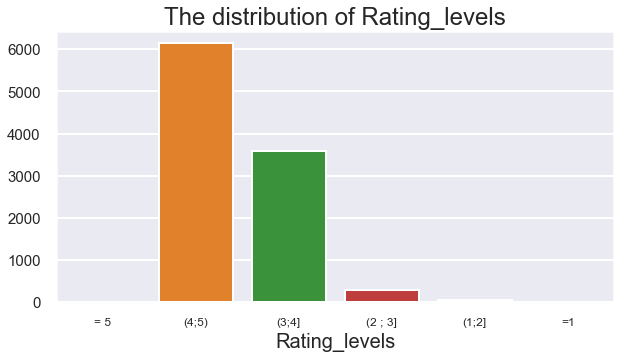

In [128]:
mp.figure(figsize=(10,5))
mp.rc('ytick', labelsize = 15)
mp.rc('xtick', labelsize = 12)
sbn.countplot(google_data['Rating_levels'])
mp.title('The distribution of Rating_levels')
mp.xlabel( 'Rating_levels', size = 20)
mp.ylabel('')
#for index, value in enumerate(df_auto['Գնային մակարդակ'].value_counts().sort_index()):
    #plt.text(value, index, str(value))
#plt.show()

In [129]:
pd.crosstab(google_data['App'],google_data['Rating_levels']).head(100)

Rating_levels,(4;5),(3;4],(2 ; 3],(1;2]
App,,,,
"""i DT"" Fútbol. Todos Somos Técnicos.",0,1,0,0
+Download 4 Instagram Twitter,1,0,0,0
- Free Comics - Comic Apps,0,1,0,0
.R,1,0,0,0
/u/app,1,0,0,0
...,...,...,...,...
7 Nights at Pixel Pizzeria - 2,0,1,0,0
7 Weeks - Habit & Goal Tracker,1,0,0,0
7 minute abs workout - Daily Ab Workout,1,0,0,0


pd.crosstab(google_data['Reviews'],google_data['Rating_levels'])